# Support Vector Machine Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [3]:

data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [ ]:
data.groupby('Admitted').mean()

### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [4]:
print(len(data[data['Admitted'] == 1]))
print(len(data[data['Admitted'] ==1])/len(data))

247
0.6175


### What percent of students with research experience were admitted?

In [5]:
research = data[data['Research'] == 1]
print(len(research[research['Admitted'] == 1])/len(research))

0.8264840182648402


### What percent of students admitted had research experience?

In [6]:
print(len(data[data['Research'] == 1])/len(data))

0.5475


### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

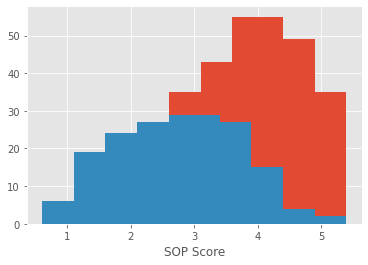

In [7]:
admitted = data[data['Admitted']==1]
admit = admitted.groupby('SOP').count()
rejected = data[data['Admitted'] ==0]
reject = rejected.groupby('SOP').count()

plt.style.use('ggplot')
plt.bar(admit.index, admit['GRE'])
plt.bar(reject.index, reject['GRE'])
plt.xlabel('SOP Score')
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

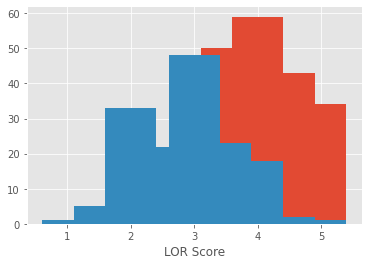

In [8]:
admitted = data[data['Admitted']==1]
admit = admitted.groupby('LOR').count()
rejected = data[data['Admitted'] ==0]
reject = rejected.groupby('LOR').count()

plt.style.use('ggplot')
plt.bar(admit.index, admit['GRE'])
plt.bar(reject.index, reject['GRE'])
plt.xlabel('LOR Score')
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

Text(0.5, 1.0, 'GRE vs. TOEFL Admissions')

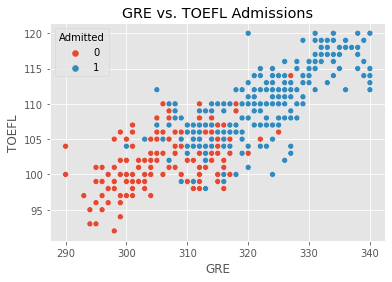

In [10]:
import seaborn as sns 

sns.scatterplot(x='GRE', y='TOEFL',data=data,hue='Admitted')
plt.title('GRE vs. TOEFL Admissions')

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

Text(0.5, 1.0, 'GPA vs. TOEFL Admissions')

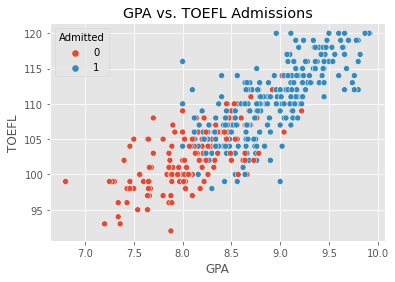

In [11]:
sns.scatterplot(x='GPA', y='TOEFL',data=data,hue='Admitted')
plt.title('GPA vs. TOEFL Admissions')

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

Text(0.5, 1.0, 'GRE vs. GPA Admissions')

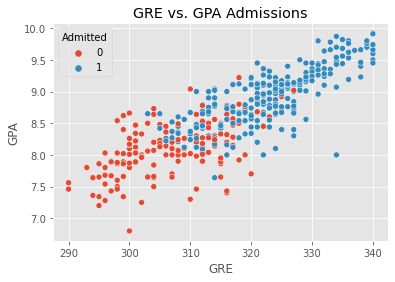

In [12]:
sns.scatterplot(x='GRE', y='GPA',data=data,hue='Admitted')
plt.title('GRE vs. GPA Admissions')

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [13]:
from sklearn.model_selection import train_test_split
y = data['Admitted']
X = data.drop('Admitted',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [16]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
fit = svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.875
0.9125


### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc.predict(X_test)))

print(classification_report(y_train, svc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.94      0.92      0.93        48

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       121
           1       0.90      0.90      0.90       199

    accuracy                           0.88       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.87      0.88      0.87       320

